### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2016 ###

# Optimization Applied To Network Topology #

#### Sahit Mandala (mandala@wisc.edu) and Wayne Chew (Ming Chan, mchew2@wisc.edu)

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-discussion)
  1. [Optional Subsection](#4.A.-Feel-free-to-add-subsections)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##
Our project is focused on finding and constructing an optimal, functional computer network design, or network topology, which contrasts performance with cost. In particular, we aim to minimize cost by efficiently connecting the network with maximum bandwidth while using budget-conscious tradeoffs in equipment choices. Our approach to this problem attempts to decouple these 2 methods to build a computationally tractable method for estimating seemingly optimal network designs and understanding the relationship between budget and performance.

Network topology is at the heart of today's hierarchacal internet infrastructure, from connecting machines in an office to datacenters between continients. Organizations and private companies would like to provide connectivity and performance while reducing the amount of infrastructure and overall costs they must incur. One instance of this problem is in fiber optic network infrastructure for tier 1 networks, which manage the backbone of internet traffic nationally and internationally.

Nowadays, fiber optic cable is said to be the best cable because of its speed and reliability. However, it is not fully installed in every city because of its cost ([citations](http://broadbandnow.com/Fiber)). The cost for the cable itself is not that high but the cost of installing the cable is the problem. It takes a lot of money to for construction, apparatus, and manpower ([citations](http://www.firetide.com/blog/what-is-the-real-cost-of-fiber-networking/)). The per mile cost for installing the cable range from \$10,000 to \$100,000. Hence, we would like to find the shortest path to install the cable so that all cities are connected ([citations](http://www.itscosts.its.dot.gov/its/benecost.nsf/DisplayRUCByUnitCostElementUnadjusted?ReadForm&UnitCostElement=Fiber+Optic+Cable+Installation+&Subsystem=Roadside+Telecommunications+)).

Furthermore, there are different types of fiber optic cables. Higher quality cables will cost more per mile while lower quality cables will cost less per mile. By instinct, the best way is to install the higher quality cables since it is more reliable and faster. However, there is a budget constraint and you might not have enough money to install high quality cables for all cities. Hence, you have to find a way to maximize the amount of high quality connection and stay below the budget at the same time.

We consider the task of a major Internet company (e.g. Google) or cable company tasked with the role of connecting several major cities (each with a data center for routing) across the US via fiber optic cables. The company would like to minimize the cost while maximizing performance for its users. They have the option of using 2 types of cables, single mode and multimode fiber optic cable, each with their own cost and associated performance. The company also has to find a way to connect all the cities, so that traffic can flow from any data center to any other data center. What is the optimal network design, including optimal choice of cabling, for any given budget?


To do so in a computational feasible manner, we aim to solve 2 separated problems, one aimed at modeling the total network to achieve connectivity while minimizing cost. With this choice of connections, we then attempt to find the be

![fixit flowchart][flow]

[flow]: http://www.metronetzing.org/images/dynamic/image/national.jpg?1288882944959

The aim of this project is to find the optimal method to connect all cities with fiber optic cable. Imagine that you are the mayor of a few cities that have very slow internet speed and the people demand for an upgrade. Hence, you have to find a way to connect all the cities with a better cable and allocate a budget for that project. How many possible ways are there to do this? And which way is the cheapest and the best?

Nowadays, fiber optic cable is said to be the best cable because of its speed and reliability. However, it is not fully installed in every city because of its cost ([citations](http://broadbandnow.com/Fiber)). The cost for the cable itself is not that high but the cost of installing the cable is the problem. It takes a lot of money to remove obstacles and dig deep enough to install the cables ([citations](http://www.firetide.com/blog/what-is-the-real-cost-of-fiber-networking/)). The per mile cost for installing the cable range from \$10,000 to \$100,000. Hence, we have to find the shortest path to install the cable so that all cities are connected ([citations](http://www.itscosts.its.dot.gov/its/benecost.nsf/DisplayRUCByUnitCostElementUnadjusted?ReadForm&UnitCostElement=Fiber+Optic+Cable+Installation+&Subsystem=Roadside+Telecommunications+)).

The first part of this project focus on finding a graph to connect all the cities. Here's an example of how it might look like.

![minimum spanning tree][flow]

All the nodes or the dots are cities and there are a lot of paths between cities. And our aim is to find a shortest way to connect all the cities.

Furthermore, there are different types of fiber optic cables. Higher quality cables will cost more per mile while lower quality cables will cost less per mile. By instinct, the best way is to install the higher quality cables since it is more reliable and faster. However, there is a budget constraint and you might not have enough money to install high quality cables for all cities. Hence, you have to find a way to maximize the amount of high quality connection and stay below the budget at the same time. This is the focus of the second part of the project.

In this project, we made a few assumptions. We assume that the cost for the installation of fiber optic cable is the same cost per mile for the respective cables regardless of the location it is installed. We also assume that there are only two types of fiber optic cables. Cable 1 with a bandwidth of 10Ghz and 20k cost per mile and Cable 2 with a bandwidth of 20Ghz and 45k cost per mile.

Finally, this model can be generalized to connecting cables between places. If there are new types of cables in the market, this model can find the optimal way to connect the cables.

[flow]: https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Minimum_spanning_tree.svg/300px-Minimum_spanning_tree.svg.png

## 2. Mathematical model ##

A discussion of the modeling assumptions made in the problem (e.g. is it from physics? economics? something else?). Explain the decision variables, the constraints, and the objective function. Finally, show the optimization problem written in standard form. Discuss the model type (LP, QP, MIP, etc.). Equations should be formatted in $\LaTeX$ within the IJulia notebook. For this section you may **assume the reader is familiar with the material covered in class**.

Our overall goal was to construct a fiber optic network with trade-offs between costs and bandwidth offered by the network. To do this, we sought a network over the 2-cables that are using for fiber optic networks. We aimed to minimize the cost of the whole network while maximizing the total bandwidth over the network. However, coupling these 2 goals proved difficult on their own, both in model complexity and computational tractability. So instead, we devided the model into 2 components, with the solution to the 1st becoming the input parameter to the 2nd.

Our first model is a minimal connected graph over all nodes using a MIP formulation. Here, we attempt to calculate the optimium subgraph using a network flow "subproblem". Here, we want to find a subgraph with all vertices for which there exists atleast 1 path from a chosen node to every other node, implying that the subgraph is connected. To do so, we fix some node as a source with supply flow of n-1 units. Then we then set every other node as a sink with demand of 1 unit. Every edge can have unlimited flow across it. The only way for this supply and demand to be satisfied is for the supply to be distributed across all nodes, each consuming 1 unit of this flow; that is, there must exist atleast 1 path for the flow from this source to every sink. Hence, we much choose edges in our subgraph such that this flow problem "constraints" have some solution, implying connectivity. To achieve the cheapest such subgraph, we minimize the weighed sum of the edges chosen with their weights.

We make a quick note that because we are allowing connections between any pairs of cities/nodes, we are considering any edges between any nodes $i,j \in V$ (as opposed to $i,j \in V$ s.t. $(i,j) \in E$, which is equivalent but for general graphs.)

### Model 1: Minimal connected graph

### Parameters
$V$: Set of vertices (i.e. cities) over our graph

$n$: Number of unique vertices in graph ($n=|V|$)

$c$: n by n weighted adjecency matrix of distances between node i and j: 

### Decision variables:
We use $x_{i,j}$ as an indicator matrix for whether the edge from i to j is included within our subgraph solution. We note that because our network flow formulation allows flow bidirectionally on each "undirected" edge

$$
\begin{aligned}
x_{i,j} \in {\{0,1\}} && \forall i,j \in V
\end{aligned}
$$

We use a nonnegative variable, to encode information about the network flow between nodes i and j, as part of the connectivity solution; Noting that the max flow over any edge is n-1 because there is only n-1 supply over the whole network (from node 1),:

$$
\begin{aligned}
n-1 \geq flow_{i,j} \geq 0 && \forall i,j \in V
\end{aligned}
$$


### Constraints:

We do not want to consider self loops on nodes as prospective edges.

$$
\begin{aligned}
& flow_{i,i}=0 && \forall i \in V \\
x_{i,i}=0 && \forall i \in V
\end{aligned}
$$

For node 1 (any arbitrary node chosen from S), we have a source node with n-1 unit supply. We utilize the conservation of flow equations across incoming and outgoing edges to form this constraint:

$$
(n-1)+\sum_{j \in V} flow_{j,1}*x_{j,1}-\sum_{j \in V} flow_{1,j}*x_{1,j} = 0
$$

For all nodes $i \in V$ with $i \neq 1$, they have net demand 1. Thus, the conservation of flow equations becomes:

$$\sum_{j \in V} flow_{j,i}*x_{j,i}-\sum_{j \in V} flow_{i,j}*x_{i,j} = 1$$

We would like to encode a constaint to force flows only over edges that are "included". That is, if there exists a flow from nodes i to j for $i,j \in V$, then $x_{i,j}=1$. We can use our upper limit $n-1$ from on the flow variable to write an equivalent inequality constraint:

$$
\begin{aligned}
(n-1)*x_{i,j} \geq flow_{i,j} && \forall i,j \in V
\end{aligned}
$$

### Objective: 
Our choice of edges in our subgraph seeks to minimize the total cost across all included edge weights. To do so, we calculate the weighted sum of each edges' weight (i.e. distance) with $x_{i,j}$, the binary indicator of whether it is included in our subgraph:

$$f(x)=\sum_{i \in V}\sum_{j \in V}c_{i,j}*x_{i,j}$$

### Standard form
Overall, our problem becomes:

$$
\begin{aligned}
\underset{x \in \mathbb{R^n}}{\text{minimize}}\qquad& \sum_{i \in V}\sum_{j \in V}c_{i,j}*x_{i,j} \\
\text{subject to:}\qquad
& (n-1)+\sum_{j \in V} flow_{j,1}*x_{j,1}-\sum_{j \in V} flow_{1,j}*x_{1,j} = 0 \\
& \sum_{j \in V} flow_{j,i}*x_{j,i}-\sum_{j \in V} flow_{i,j}*x_{i,j} = 1 && 1 \neq i \in V \\
& (n-1)*x_{i,j} \geq flow_{i,j} && \forall i,j \in V \\
& n-1 \geq flow_{i,i}=0 && \forall i \in V \\
& x_{i,i}=0 && \forall i \in V \\
& flow_{i,j} \geq 0 && \forall i,j \in V \\
& x_{i,j} \in {\{0,1\}} && \forall i,j \in V
\end{aligned}
$$

### Solution

The directed adjacency matrix $x$. We note that this encodes a directed graph adjacency matrix; in our solution, we treat these edges as undirected since our fiber optic network connections are bidirectional. Hence, this undirected graph becomes our optimal network.

### Part B: Cost-Bandwidth Tradeoff on 2-Cable System

### Parameters
$lambda$: Trade off parameter on bandwidth

$cost1$: Cost per mile for cable 1 (in dollars)

$cost2$: Cost per mile for cable 2 (in dollars)

$V$: Set of vertices (i.e. cities) over our graph

$n$: Number of unique vertices in graph ($n=|V|$)

$x$: n by n adjecency matrix of minimal connected graph

$c$: n by n weighted adjecency matrix of distances between node i and j

$budget$: Upper limit on the total cost of the networking; varied to show "tradeoff" with average bandwidth

### Decision variables:
We use $edge1$ and $edge2$ as indicator matrices for whether the edge from i to j used cable type 1 or cable type 2 respectively.

$$
\begin{aligned}
edge1_{i,j} \in {\{0,1\}} && \forall i,j \in V \\
edge2_{i,j} \in {\{0,1\}} && \forall i,j \in V
\end{aligned}
$$


### Constraints:

Every edge in either $edge1$ or $edge2$ must be an edge in $x$, the original graph. Furthermore, every edge in this graph must be included in either one of $edge1$ or $edge2$. And of course, $edge1$ and $edge2$ cannot share any edges. To achieve this, we require the sum of the 2 adjacency matrices to equal the adjacency matrix $x$. Then for each $(i,j)$, if $x_{i,j}=1$, then exactly one of $edge1_{i,j}=1$ or $edge2_{i,j}=1$, but not both. And if $x_{i,j}=0$, both $edge1_{i,j}=0$ and $edge2_{i,j}=0$.

$$
\begin{aligned}
edge1_{i,j}+edge2_{i,j}=x_{i,j} && \forall i \in V
\end{aligned}
$$

The total cost of the network design must be less than the budget. The cost of each edge in the network can be written as $cost1*c_{i,j}*edge1_{i,j}+cost2*c_{i,j}*edge2_{i,j}$. If $edge_{i,j}=1$, the either $edge1_{i,j}=1$ or $edge2_{i,j}=1$ (but not both). So then this expression is $cost1*c_{i,j}$ or $cost2*c_{i,j}$ respectively, which is the cost of that edge. We do this sum over all pairs of vertices:

$$
\sum_{i \in V}\sum_{j \in V}cost1*c_{i,j}*edge1_{i,j}+cost2*c_{i,j}*edge2_{i,j} \leq budget
$$


### Objective: 
Our choice of edges in our subgraph seeks to maximize the weighted average bandwidth. To calculate this, we do a weighted sum of $edge1$'s cables with their distances and bandwidth and $edge2$'s cables with their distances and bandwidth. We then divide by the total distance across entire network to get the weigthed average. This weighted average roughly indicates the expected bandwidth and thus performance across the network.

$$f(x)=\frac{\sum_{i \in V}\sum_{j \in V}bandwidth1*c_{i,j}*edge1_{i,j}+bandwidth2*c_{i,j}*edge2_{i,j}}{\sum_{i \in V}\sum_{j \in V}c_{i,j}*x_{i,j}}$$

### Standard form
Overall, our problem becomes:

$$
\begin{aligned}
\underset{x \in \mathbb{R^n}}{\text{minimize}}\qquad& \frac{\sum_{i \in V}\sum_{j \in V}bandwidth1*c_{i,j}*edge1_{i,j}+bandwidth2*c_{i,j}*edge2_{i,j}}{\sum_{i \in V}\sum_{j \in V}c_{i,j}*x_{i,j}} \\
\text{subject to:}\qquad
& edge1_{i,j}+edge2_{i,j}=x_{i,j} && \forall i \in V \\
& \sum_{i \in V}\sum_{j \in V}cost1*c_{i,j}*edge1_{i,j}+cost2*c_{i,j}*edge2_{i,j} \leq budget \\
& edge1_{i,j} \in {\{0,1\}} && \forall i,j \in V \\
& edge2_{i,j} \in {\{0,1\}} && \forall i,j \in V
\end{aligned}
$$

### Solution

The 2 adjacency matricies $edge1$, $edge2$ which indicate which edges are constructed with Cable 1 and Cable 2 respectively.

## 3. Solution ##

Here, you should code up your model in Julia + JuMP and solve it. Your code should be clean, easy to read, well annotated and commented, and it should compile! You are not allowed to use other programming languages or DCP packages such as `convex.jl`. **I will be running your code**. I suggest having multiple code blocks separated by text blocks that explain the various parts of your solution. You may also solve several versions of your problem with different models/assumptions.

In [1]:
using JuMP
using Ipopt
using Clp
using NamedArrays
using PyPlot
using Interact
using PyPlot
using PyCall
@pyimport mpl_toolkits.basemap as basemap

/Users/patron/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Data

In [8]:
# Zayo Data centers

#Parameter: V, Array of centers
centers = [
    "Ashburn, VA", 
    "Atlanta, GA",
    "Austin, TX",
    "Boise, ID",
    "Boston, MA",
    "Chicago, IL",
    "Cincinnati, OH",
    "Dallas, TX",
    "Denver, CO",
    "Las Vegas, NV",
    "Los Angeles, CA",
    "Miami, FL", 
    "Minneapolis, MN",
    "Nashville, TN",
    "New York, NY",
    "Palo Alto, CA",
    "Seattle, WA"
];

# Adjacency matrix of distances (in miles) between cities, which will the the weights on each edge
raw = [
0 530.09 1298.47 2019.68 407.64 568.43 377.67 1163.11 1466.9 2061.18 2274.22 927.81 907.4 546.61 219.44 2408.07 2301.47; 
530.09 0 819.05 1835.68 936.77 587.61 369.12 720.98 1211.82 1746.3 1936.72 604.25 907.48 214.41 747.91 2127.93 2182.0;
1298.47 819.05 0 1369.13 1695.9 978.7 966.71 181.41 770.49 1084.97 1227.24 1114.85 1043.11 753.26 1514.07 1483.42 1770.16; 
2019.68 1835.68 1369.13 0 2260.77 1451.59 1666.27 1288.75 638.33 517.03 668.68 2363.43 1137.39 1636.24 2153.05 528.88 404.84; 
407.64 936.77 1695.9 2260.77 0 850.51 740.15 1551.6 1769.63 2375.49 2596.47 1255.68 1123.74 942.98 188.88 2695.68 2492.19; 
568.43 587.61 978.7 1451.59 850.51 0 251.98 804.53 920.44 1525.31 1745.96 1188.01 355.4 396.76 713.32 1854.17 1737.66; 
377.67 369.12 966.71 1666.27 740.15 251.98 0 814.07 1093.91 1684.43 1896.68 952.06 605.37 237.64 570.01 2035.78 1971.4; 
1163.11 720.98 181.41 1288.75 1551.6 804.53 814.07 0 662.38 1071.64 1240.4 1110.68 862.67 617.53 1374.14 1467.73 1681.41; 
1466.9 1211.82 770.49 638.33 1769.63 920.44 1093.91 662.38 0 606.85 831.19 1725.4 699.41 1022.67 1632.05 941.87 1021.34; 
2061.18 1746.3 1084.97 517.03 2375.49 1525.31 1684.43 1071.64 606.85 0 227.85 2181.13 1296.22 1580.67 2234.21 398.66 871.0; 
2274.22 1936.72 1227.24 668.68 2596.47 1745.96 1896.68 1240.4 831.19 227.85 0 2339.02 1523.57 1780.85 2451.84 320.99 958.82; 
927.81 604.25 1114.85 2363.43 1255.68 1188.01 952.06 1110.68 1725.4 2181.13 2339.02 0 1511.2 814.76 1090.82 2578.14 2733.5;
907.4 907.48 1043.11 1137.39 1123.74 355.4 605.37 862.67 699.41 1296.22 1523.57 1511.2 0 697.01 1019.23 1583.16 1395.08; 
546.61 214.41 753.26 1636.24 942.98 396.76 237.64 617.53 1022.67 1580.67 1780.85 814.76 697.01 0 760.88 1952.83 1974.66;
219.44 747.91 1514.07 2153.05 188.88 713.32 570.01 1374.14 1632.05 2234.21 2451.84 1090.82 1019.23 760.88 0 2567.48 2408.45;
2408.07 2127.93 1483.42 528.88 2695.68 1854.17 2035.78 1467.73 941.87 398.66 320.99 2578.14 1583.16 1952.83 2567.48 0 701.45; 
2301.47 2182.0 1770.16 404.84 2492.19 1737.66 1971.4 1681.41 1021.34 871.0 958.82 2733.5 1395.08 1974.66 2408.45 701.45 0;
];
distance = NamedArray(raw, (centers,centers), ("from","to"))
# Parameter: n, number of vertices
n = length(centers)

# Coordinate data of each city, used for plotting on map
data = [
39.0437192 -77.4874898;
33.7490987 -84.3901848;
30.2711286 -97.7436994;
43.61656 -116.2008349;
42.3604823 -71.0595677;
41.8755546 -87.6244211;
39.1014537 -84.5124601;
32.7762719 -96.7968558;
39.7391536 -104.9847033;
36.1662859 -115.1492249;
34.0543942 -118.2439408;
25.7742658 -80.1936588;
44.9772995 -93.2654691;
36.1622296 -86.774353;
40.7305991 -73.9865811;
37.442156 -122.1634471;
47.6038321 -122.3300623;
];
lat = Dict(zip(centers,data[:,1]));
lon = Dict(zip(centers,data[:,2]));

# Cost for the cables per mile and the budget
cost1 = 1;
cost2 = 2;
budget = 10000;

10000

### Helper functions

In [16]:
# US Network Map plotter; Credits to Prof. Lessard
# Generates a US plot of graph solution based on "edge" decision variable
function mapSolution(x=0)
    # US Map plot for background
    m=basemap.Basemap(projection="merc", resolution="l",llcrnrlat=23,llcrnrlon=-126,urcrnrlat=50,urcrnrlon=-70)
    m[:drawmapboundary](fill_color="#4771a5")
    m[:fillcontinents](color="#555555")

    # plot cities, based on lat, long coordinates
    for i in centers
        m[:plot](lon[i], lat[i], "ro" ,latlon=true)
    end
    
    # Plot each edge included in network from the solution matrix
    for i in centers
        for j in centers
            if x[i,j] > 0.9
                m[:drawgreatcircle](lon[i],lat[i],lon[j],lat[j],linewidth=1,color="b")
            end
        end
    end
end;

# US Network map plotter for 2-cable network; plots 2 subgraphs with different colors
function mapSolutionB(x=0, y=0)
    m=basemap.Basemap(projection="merc", resolution="l",llcrnrlat=23,llcrnrlon=-126,urcrnrlat=50,urcrnrlon=-70)
    m[:drawmapboundary](fill_color="#4771a5")
    m[:fillcontinents](color="#555555")

    # plot cities, based on lat, long coordinates
    for i in centers
        m[:plot](lon[i], lat[i], "ro" ,latlon=true)
    end
    
    # Plot each edge included in network, from each adj matrix, onto the map with color-coding
    for i in centers
        for j in centers
            if x[i,j] > 0.9
                m[:drawgreatcircle](lon[i],lat[i],lon[j],lat[j],linewidth=1,color="b")
            end
            if y[i,j] > 0.9
                m[:drawgreatcircle](lon[i],lat[i],lon[j],lat[j],linewidth=1,color="g")
            end
        end
    end
end
;

# Subset generator:
# Given a number n, it generators all subsets of the set {1,2,...,n}
# Returns array of arrays, each array representing a subset
function genSubsets(nn)
    if (nn==1) # Base case
        return Array[[1],[]]
    else
        # Recursively include, exclude current element in subsets
        sol = genSubsets(nn-1);
        for i in 1:length(sol)
            push!(sol,[sol[i];nn])
        end
        return sol
    end
end;

### Part A: Minimal connected graph

In [5]:
m = Model()

### Decision Variables ###

# Binary matrix variable x_i,j
@variable(m, edge[centers,centers], Bin) 

# Flow variable, how much flow over edge (no upper limit)
@variable(m, flow[centers,centers] >=0) 


### Constraints ###

for i in centers
    # Self-loops not allowed
    @constraint(m, edge[i,i]==0)
    @constraint(m, flow[i,i]==0)
    
    ## If flow on edge i,j, then we need edge i,j in network (so edge_i,j=1)
    for j in centers
        @constraint(m,flow[i,j] <= (n-1)*edge[i,j]) # encodes "if flow >0, then edge==1" 
    end
    
    # Conservation of flow equations
    if (i==centers[1])
        
        # "1st" node is source, we have unit supply flow of n-1, so (n-1) + net inflow - net outflow = 0
        @constraint(m, n-1 + sum{flow[c,i], c=centers} - sum{flow[i,c], c in centers} ==0); # center 1 has (n-1 inflow,)
    else
        
        # Other nodes have demand of 1 unit, so inflow - outflow = 1
        @constraint(m, sum{flow[c,i], c=centers}-sum{flow[i,c], c in centers}==1); #Every other node has 1 outflow
    end
end

### Objective function: Min total cost of weights on solution network edges ###
@objective(m, Min, sum{edge[i,j]*distance[i,j], i in centers, j in centers});


s=solve(m);

:Optimal

### Part B: 2-Cable tradeoff

Total Cost: 11977.099999999999
Total length of Cable2: 5988.549999999999


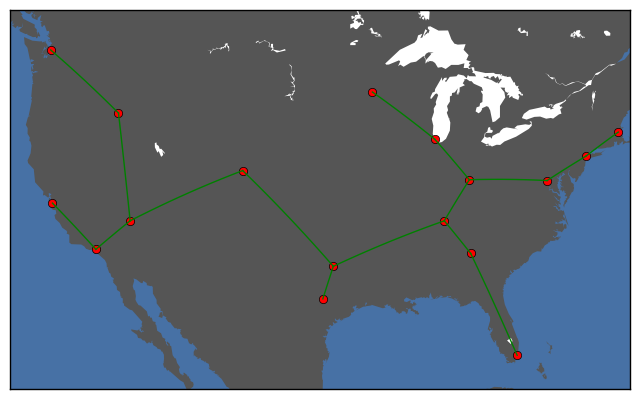

In [12]:
edgeResult = getvalue(edge) # edgeResult is the edges from the previous model, shortest distance to cover all the cities

m2 = Model()

# Edges for different cables, edge1 = cable1, edge2 = cable2
@variable(m2, edge1[centers,centers], Bin)
@variable(m2, edge2[centers,centers], Bin)

# Constraint to make sure that all the edges are filled up by cables
@constraint(m2, c1[i in centers, j in centers], edge1[i,j] + edge2[i,j] == edgeResult[i,j])

# Cost for the cables
@expression(m2, cost, sum{edge1[i,j]*distance[i,j]*cost1 + edge2[i,j]*distance[i,j]*cost2, i in centers, j in centers})

# Maximize the length of cable2 because cable2 is of better quality
@objective(m2, Max, sum{edge2[i,j]*distance[i,j], i in centers, j in centers})

s=solve(m2)

## 4. Results and discussion ##

Here, you display and discuss the results. Show figures, plots, images, trade-off curves, or whatever else you can think of to best illustrate your results. The discussion should explain what the results mean, and how to interpret them. You should also explain the limitations of your approach/model and how sensitive your results are to the assumptions you made.

Use plots (see `PyPlot` and `Gadfly` examples from class), or you can display results in a table like this:

| Tables        | Are           | Cool  |
| ------------- |:-------------:| -----:|
| col 3 is      | right-aligned |\$1600 |
| col 2 is      | centered      |  \$12 |
| zebra stripes | are neat      |   \$1 |

### 4.A. Feel free to add subsections

#### 4.A.a. or subsubsections

### US Map of network

5988.549999999999


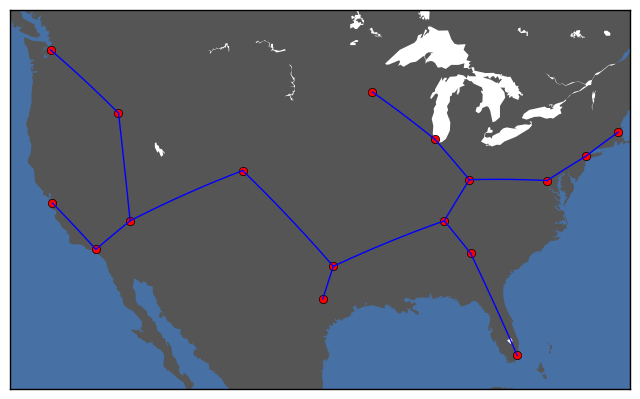

In [6]:
println(getobjectivevalue(m))
mapSolution(getvalue(edge))

### Part 2: Cost-Bandwidth Trade-Off on 2-Cable Network

In [ ]:
println("Total Cost: ", getvalue(cost))
println("Total length of Cable2: ", getobjectivevalue(m2))

mapSolution(getvalue(edge1), getvalue(edge2))

## 5. Conclusion ##

Summarize your findings and your results, and talk about at least one possible future direction; something that might be interesting to pursue as a follow-up to your project.

## 6. Appendix ##

### Part A: Min Spanning Tree Model

Seeking a connected undirected graph with minimal cost, we looked at minimum spanning trees. In our graph, each potential edge from $i \rightarrow j$ has an associated cost $c*d_{i,j}$. Minimizing the cost of our network is equivalent in minimizing the sum of costs of every edge we include in our network. However, we would like a connected graph such that data from any node can reach any other node. The minimum spanning tree provides the optimial connected subgraph with minimum total edge cost [See 4]. We use the subtour formulation of the min-spanning tree problem from [see 5].


### Model 

#### Decision variables:

Binary indicator for whether edge between i,j exists in our solution network:

$$ 
\begin{aligned}
x_{i,j} \in {\{0,1\}} && \forall i,j \in V
\end{aligned}
$$

#### Constraints:

The minimum spanning tree, as a tree, must have exactly n-1 edges:

$$
\sum_{i,j \in V}{x_{i,j} = n-1}
$$

Our tree should not have any self loops:

$$
\begin{aligned}
x_{i,i}=0 && \forall i \in V
\end{aligned}
$$

To prevent disconnected components, we use a subtour elimination constraint that prevents cycles. To do so, we consider every possible subset of nodes S and require that the induced subgraph (that is, the subgraph with edges only between these points) must have less than $|S|-1$ edges. This does require us to generate and enummerate $2^{n}$ constraints since there are $2^{n}$ possible subsets; note that we can ignore trivial and singular subsets (one node subgraph has L-1=0 nodes automatically when enforcing no self-loops). 

$$
\begin{aligned}
\sum_{i,j \in S}{x_{i,j} \leq |S|-1} && \forall S \subset V
\end{aligned}
$$

#### Objective: 
Our choice of edges in our subgraph seeks to minimize the total cost across all included edge weights. To do so, we calculate the weighted sum of each edges' weight with $x_{i,j}$, the binary indicator of whether it is included in our subgraph:

$$f(x)=\sum_{i \in V}\sum_{j \in V}c_{i,j}*x_{i,j}$$


Overall, our problem becomes:

$$
\begin{aligned}
\underset{x \in \mathbb{R^n}}{\text{minimize}}\qquad& \sum_{i \in V}\sum_{j \in V}c_{i,j}*x_{i,j} \\
\text{subject to:}\qquad& \sum_{i,j \in S}{x_{i,j} \leq |S|-1} && \forall S \subset V\\
& \sum_{i,j \in V}{x_{i,j} = n-1} \\
& x_{i,i}=0 && i \in V \\
& x_{i,j} \in {\{0,1\}} && i,j \in V
\end{aligned}
$$

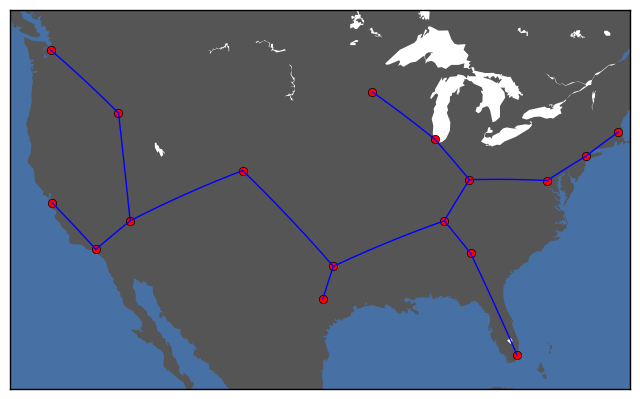

In [18]:
### Warning: This code may stall on slower machines. We had success on some machines (Macbook Air) but failed on some 
### others. We have primarily included it for reference 

m = Model();
@variable(m, edge[centers,centers], Bin) # variable x

@constraint(m, sum(edge) == n-1) # Max number of edges

for i in centers
    @constraint(m,edge[i,i]==0)
end
subsets = genSubsets(n) #Generate all subsets of indexes {1,..,n}
for arr in subsets
    L = length(arr)
    if L > 1 #ignore trivial subsets
        
        # Subtour constraint: Every subset of vertices S must have at most $|S|-1$ edges
        # in induced subgraph
        @constraint(m, sum{ edge[centers[i],centers[j]], i in arr, j in arr } <= L-1)
    end
end

# Min total weight across solution network edges
@objective(m, Min, sum{edge[i,j]*distance[i,j], i in centers, j in centers})


solve(m);
mapSolution(getvalue(edge));

While this min spanning tree model manages to find the minimal tree which connects all the nodes, the model does not allow for more generalized connected graphs (non-trees) for different possible network objectives. Also, the performance was slow, with the model not running on some of our machines. We sought a more generalized model that would allow (feasibly) for non-tree networks.